<a href="https://colab.research.google.com/github/AdithyaTanam/IST-526-Assignment-5/blob/main/IST526_Assignment5_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [89]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [90]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Ref
https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

# Time Series Analysis

# Simulate Time Series Data

## Simulating AR(1) Process
$X_t = factor \times X_{t-1} + w_t$ \\



In [94]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf
from statsmodels.tsa.stattools import  pacf

from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.6
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-2.847650
2020-06-22,2020-06-22,0.818867
2020-06-23,2020-06-23,-1.250003
2020-06-24,2020-06-24,-1.268348
...,...,...
2021-01-01,2021-01-01,0.059224
2021-01-02,2021-01-02,1.407899
2021-01-03,2021-01-03,3.274749
2021-01-04,2021-01-04,2.396968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



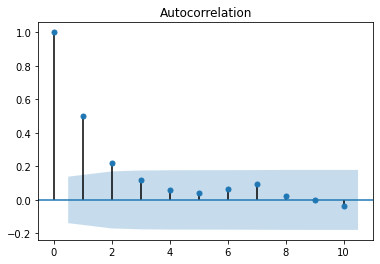

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [92]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

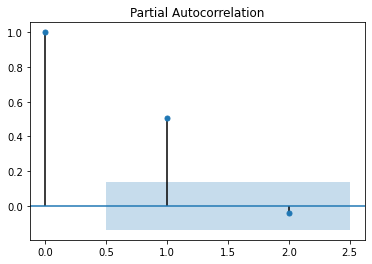

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [93]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 2)
plt.show()
print(result)

Change different value of ar_factor and see how it changes the output

Observation: For ar_factor = 0.6 I could generate similar graphs for auto correlation and time series as above but the partial correlation is not identical for all the ar_factors I had checked.